# Data visualisation with `matplotlib`

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Increase figure and font sizes
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
countries = pd.read_csv('https://github.com/estimand/teaching-datasets/raw/master/world-development-indicators/wdi-countries.csv.gz')
wdi = pd.read_csv('https://github.com/estimand/teaching-datasets/raw/master/world-development-indicators/wdi-data.csv.gz')

In [4]:
indicators = {
    'NY.GNP.PCAP.CD': 'gni_per_capita',  # GNI per capita, Atlas method (current US$)
    'SP.DYN.IMRT.IN': 'infant_mort',     # Mortality rate, infant (per 1,000 live births)
    'SP.DYN.LE00.IN': 'life_exp'         # Life expectancy at birth, total (years)
}

wdi_subset = wdi[(wdi['indicator_code'].isin(indicators.keys())) & (wdi['year'] == 2015)].copy()
wdi_subset.drop('year', axis=1, inplace=True)
wdi_subset['indicator_code'].replace(indicators, inplace=True)

In [5]:
wdi_subset.head()

,country_code,indicator_code,value
7959,ABW,life_exp,75.594341
33132,AFG,gni_per_capita,590.000000
37757,AFG,infant_mort,54.900000
37875,AFG,life_exp,63.298195
65965,AGO,gni_per_capita,4070.000000


In [6]:
wdi_subset = wdi_subset.pivot(index='country_code', columns='indicator_code', values='value')
wdi_subset.dropna(inplace=True)

In [7]:
wdi_subset.head()

indicator_code,gni_per_capita,infant_mort,life_exp
country_code,,,
AFG,590.0,54.9,63.298195
AGO,4070.0,56.9,61.189341
ALB,4300.0,12.5,78.203146
ARE,42910.0,6.7,77.484244
ARG,12430.0,10.3,76.293024


In [8]:
wdi_subset = pd.merge(wdi_subset, countries, left_index=True, right_on='country_code')

In [9]:
wdi_subset.head()

,gni_per_capita,infant_mort,life_exp,country_code,country_name,region,income_group
1,590.0,54.9,63.298195,AFG,Afghanistan,South Asia,Low income
2,4070.0,56.9,61.189341,AGO,Angola,Sub-Saharan Africa,Lower middle income
3,4300.0,12.5,78.203146,ALB,Albania,Europe & Central Asia,Upper middle income
5,42910.0,6.7,77.484244,ARE,United Arab Emirates,Middle East & North Africa,High income
6,12430.0,10.3,76.293024,ARG,Argentina,Latin America & Caribbean,Upper middle income


## Histograms and density plots

**Usage**: show the distribution of a numerical variable.

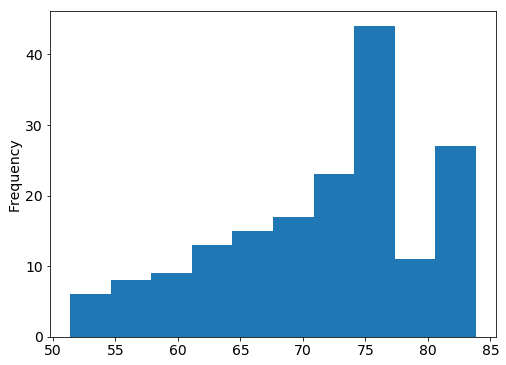

In [10]:
wdi_subset['life_exp'].plot.hist()

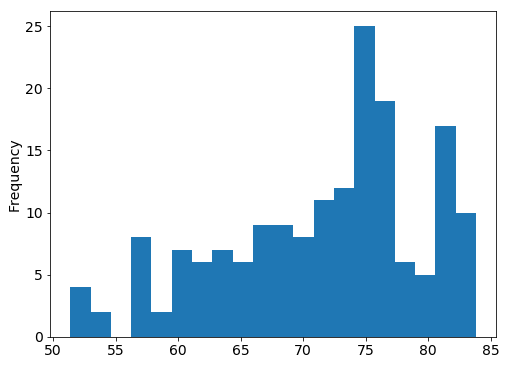

In [11]:
# Try changing the number of bins
wdi_subset['life_exp'].plot.hist(20)

Text(0,0.5,'Frequency')

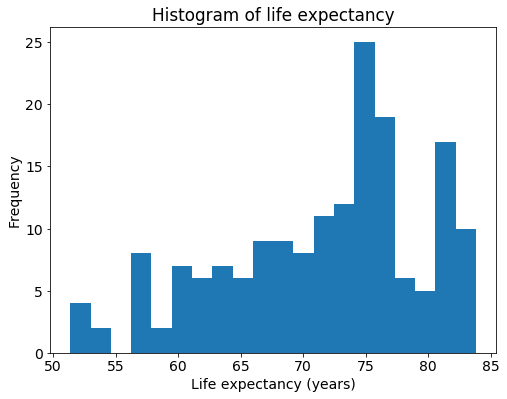

In [12]:
# Add title and labels
wdi_subset['life_exp'].plot.hist(20, title='Histogram of life expectancy')
plt.xlabel('Life expectancy (years)')
plt.ylabel('Frequency')

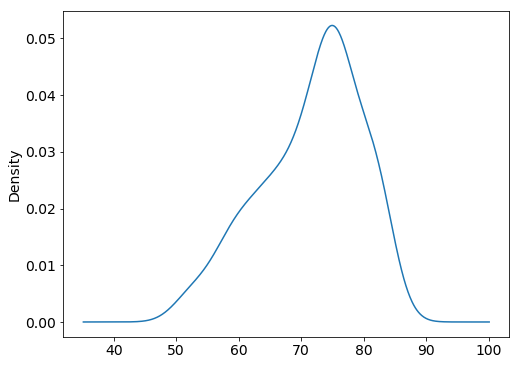

In [13]:
# Compare with the corresponding density plot
wdi_subset['life_exp'].plot.density()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99f05dbac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f99f053c5f8>]], dtype=object)

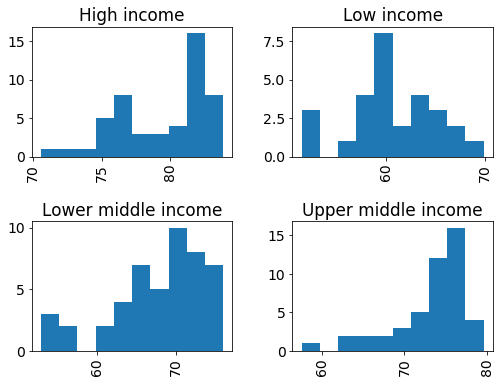

In [14]:
# Grouped histograms
wdi_subset.hist(column='life_exp', by='income_group')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99f048b940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f99f03b6978>]], dtype=object)

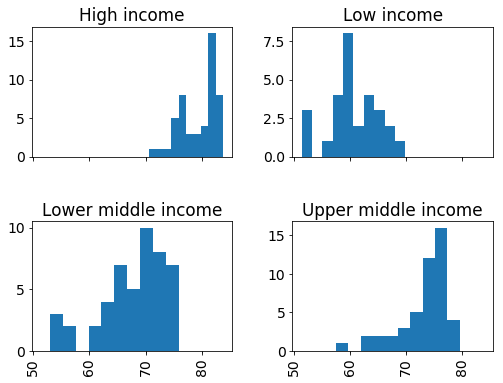

In [15]:
# Grouped histograms with shared x-axis
wdi_subset.hist(column='life_exp', by='income_group', sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99f0380e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f99f01dc3c8>]], dtype=object)

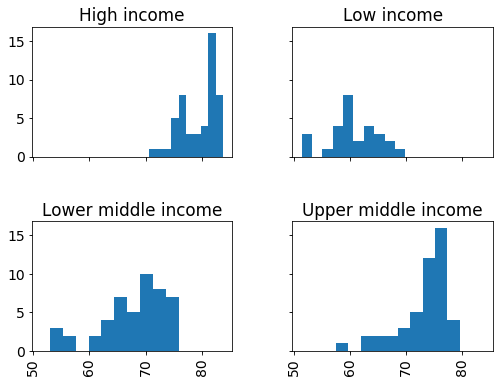

In [16]:
# Grouped histograms with shared x- and y-axes
wdi_subset.hist(column='life_exp', by='income_group', sharex=True, sharey=True)

## Scatter plots

**Usage**: show the relationship between two (or pairs of) numerical variables.

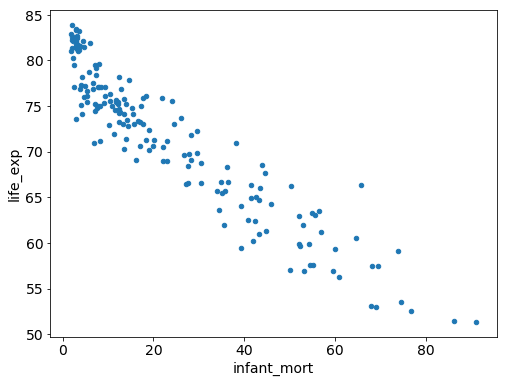

In [17]:
wdi_subset.plot.scatter(x='infant_mort', y='life_exp')

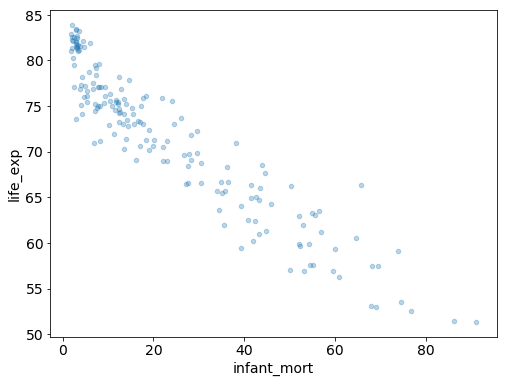

In [18]:
# Add transparency
wdi_subset.plot.scatter(x='infant_mort', y='life_exp', alpha=0.3)

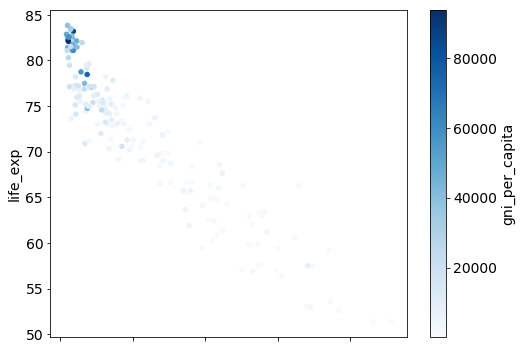

In [19]:
# Vary point colour by GNI per capita
wdi_subset.plot.scatter(x='infant_mort', y='life_exp', c='gni_per_capita', colormap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99effa5668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f99efd526a0>]], dtype=object)

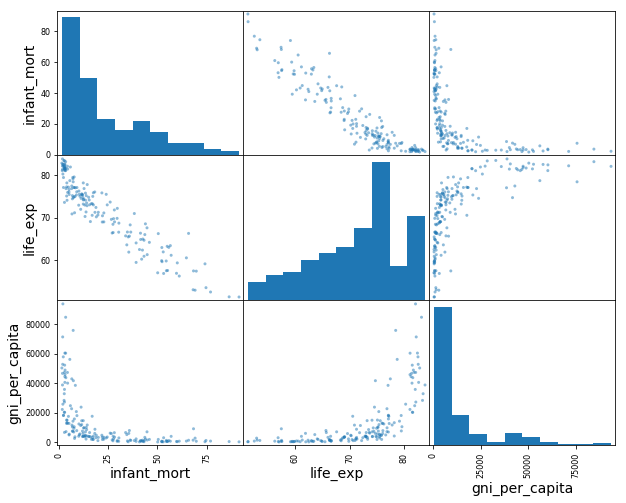

In [20]:
# Scatter matrix of three (numerical) variables
pd.plotting.scatter_matrix(wdi_subset[['infant_mort', 'life_exp', 'gni_per_capita']], figsize=(10, 8))

## Bar plots

**Usage**: show a numerical comparison across categories.

In [21]:
# Compute average life expectancy and infant mortality for each country group
wdi_subset.groupby('income_group')[['life_exp', 'infant_mort']].mean()

,life_exp,infant_mort
income_group,,
High income,79.531873,4.914000
Low income,60.462551,53.675000
Lower middle income,68.044967,32.300000
Upper middle income,73.179189,16.689362


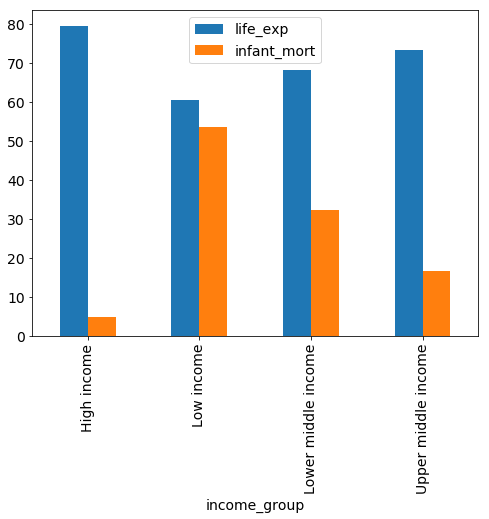

In [22]:
# Plot side-by-side
wdi_subset.groupby('income_group')[['life_exp', 'infant_mort']].mean().plot.bar()

## Box plots

**Usage**: show quartiles (and outliers) for numerical variables (also across categories).

In [23]:
# Five-number summary (min, Q1, Q2 [median], Q3, max)
wdi_subset['life_exp'].describe()

count    173.000000
mean      71.532517
std        8.020844
min       51.377854
25%       66.284049
50%       73.301683
75%       77.120268
max       83.843659
Name: life_exp, dtype: float64

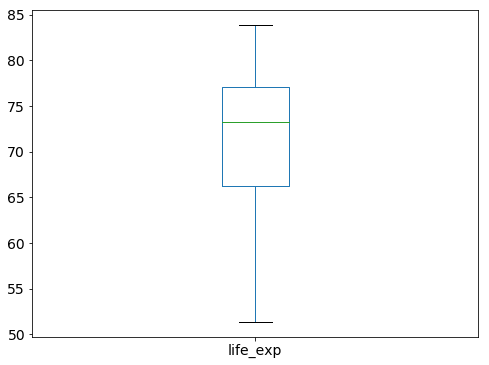

In [24]:
# Compare with box plot
wdi_subset['life_exp'].plot.box()

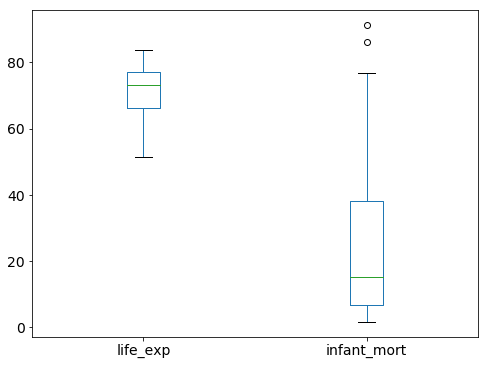

In [25]:
# Include multiple variables
wdi_subset[['life_exp', 'infant_mort']].plot.box()

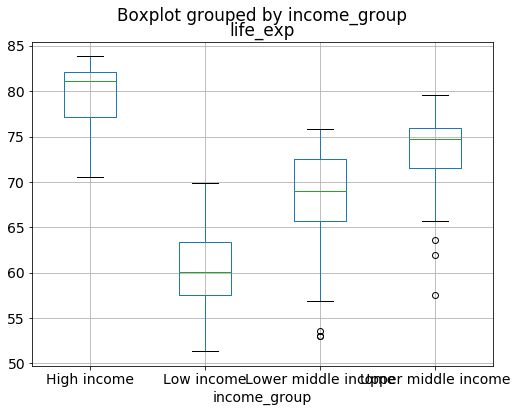

In [26]:
# Grouped box plots
wdi_subset.boxplot('life_exp', by='income_group')

## Line plots

**Usage**: show the trend of a numerical variable over time (don't use when there's no logical ordering!).

In [27]:
uk_life_exp = wdi[(wdi['country_code'] == 'GBR') & (wdi['indicator_code'] == 'SP.DYN.LE00.IN')]

In [28]:
uk_life_exp.head()

,country_code,indicator_code,year,value
2157818,GBR,SP.DYN.LE00.IN,1960,71.126829
2157819,GBR,SP.DYN.LE00.IN,1961,70.878049
2157820,GBR,SP.DYN.LE00.IN,1962,70.926829
2157821,GBR,SP.DYN.LE00.IN,1963,70.826829
2157822,GBR,SP.DYN.LE00.IN,1964,71.624390


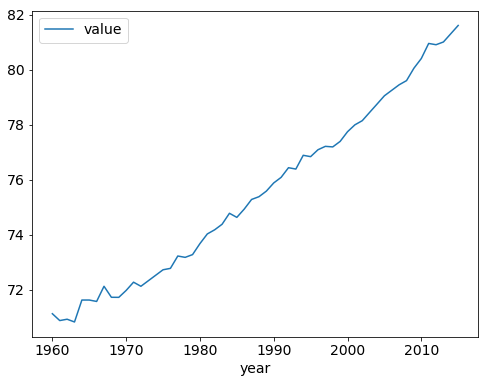

In [29]:
uk_life_exp.plot.line(x='year', y='value')